In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('./data/meets.csv')

In [23]:
df.head()

,MeetID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,0,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
1,1,365strong/1602,365Strong,2016-11-19,USA,MO,Ozark,Thanksgiving Powerlifting Classic
2,2,365strong/1603,365Strong,2016-07-09,USA,NC,Charlotte,Charlotte Europa Games
3,3,365strong/1604,365Strong,2016-06-11,USA,SC,Rock Hill,Carolina Cup Push Pull Challenge
4,4,365strong/1605,365Strong,2016-04-10,USA,SC,Rock Hill,Eastern USA Challenge


In [24]:
df.shape

(8482, 8)

In [27]:
df.isna().sum()

MeetID            0
MeetPath          0
Federation        0
Date              0
MeetCountry       0
MeetState      2986
MeetTown       1509
MeetName          0
dtype: int64

In [30]:
for col in df.columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

In [31]:
df.isna().sum()

MeetID         0
MeetPath       0
Federation     0
Date           0
MeetCountry    0
MeetState      0
MeetTown       0
MeetName       0
dtype: int64

In [32]:
import zipfile

# Extract the CSV file from the ZIP archive
with zipfile.ZipFile("./data/openpowerlifting.csv.zip", 'r') as zip_ref:
    zip_ref.extractall("./data/")
    csv_filename = zip_ref.namelist()[0]  # Assuming there's only one file in the ZIP

# Read the extracted CSV file using pandas
df_openpowerlifting = pd.read_csv(f"./data/{csv_filename}")
df_openpowerlifting.head()  # Display the first few rows of the dataframe


,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47


In [34]:
df_openpowerlifting.shape

(386414, 17)

In [33]:
df_openpowerlifting.isna().sum()

MeetID                 0
Name                   0
Sex                    0
Equipment              0
Age               239267
Division           15843
BodyweightKg        2402
WeightClassKg       3812
Squat4Kg          385171
BestSquatKg        88343
Bench4Kg          384452
BestBenchKg        30050
Deadlift4Kg       383614
BestDeadliftKg     68567
TotalKg            23177
Place               1092
Wilks              24220
dtype: int64

In [35]:
# Fill the 'Age' column with the median (converted to an integer)
median_age = int(df_openpowerlifting['Age'].median())
df_openpowerlifting['Age'].fillna(median_age, inplace=True)

# Drop the columns 'Squat4Kg', 'Bench4Kg', and 'Deadlift4Kg'
df_openpowerlifting.drop(['Squat4Kg', 'Bench4Kg', 'Deadlift4Kg'], axis=1, inplace=True)

# Fill remaining missing values with the median for each column
numeric_columns = df_openpowerlifting.select_dtypes(include=['float64']).columns
for column in numeric_columns:
    median_value = df_openpowerlifting[column].median()
    df_openpowerlifting[column].fillna(median_value, inplace=True)

df_openpowerlifting.head()  # Display the first few rows after processing

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,47.63,20.41,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,142.88,95.25,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,142.88,95.25,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,174.63,95.25,195.00,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,174.63,31.75,90.72,122.47,1,130.47


In [36]:
df_openpowerlifting.isna().sum()

MeetID                0
Name                  0
Sex                   0
Equipment             0
Age                   0
Division          15843
BodyweightKg          0
WeightClassKg      3812
BestSquatKg           0
BestBenchKg           0
BestDeadliftKg        0
TotalKg               0
Place              1092
Wilks                 0
dtype: int64

In [38]:
df_openpowerlifting.dropna(subset=['Place'], inplace=True)

In [40]:
df_openpowerlifting.dropna(subset=['WeightClassKg'], inplace=True)

In [42]:
df_openpowerlifting.dropna(subset=['Division'], inplace=True)

In [44]:
df_openpowerlifting.isna().sum().sum()

0

In [45]:
df_final = pd.merge(df_openpowerlifting, df, on='MeetID', how='inner')

In [51]:
df_final.to_csv('powerlifting.csv', index=False)

In [50]:
df_final.isna().sum().sum()

0

In [52]:
df_final['Sex'].value_counts()

Sex
M    283921
F     82089
Name: count, dtype: int64

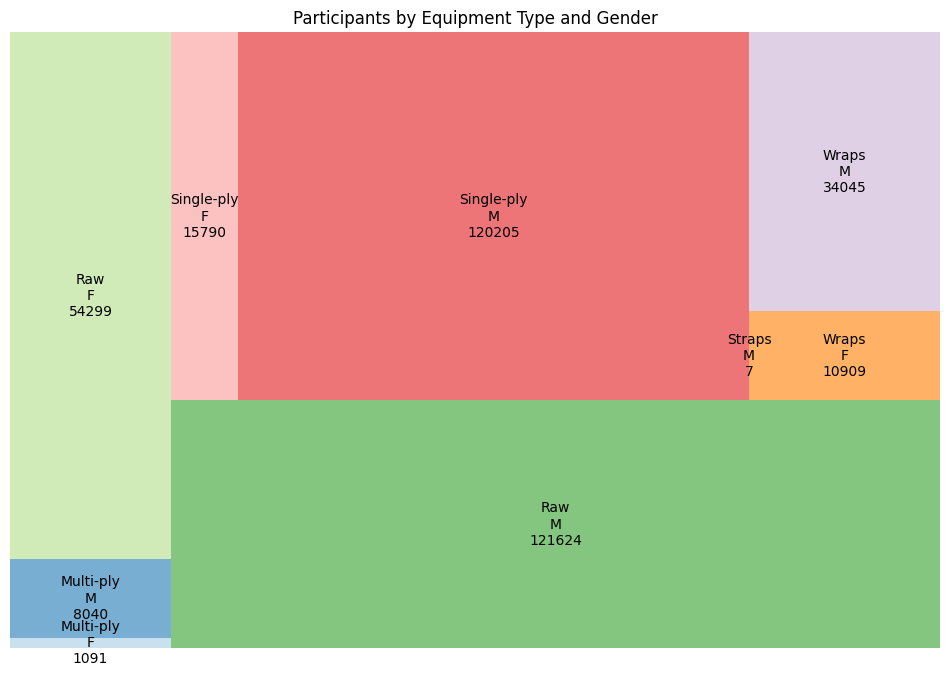

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Load your data
powerlifting_data = pd.read_csv('powerlifting.csv')

# Group by equipment and gender
grouped_data = powerlifting_data.groupby(['Equipment', 'Sex']).size().reset_index(name='Counts')

# Create a color palette, one color for each equipment type
colors = plt.cm.Paired(range(len(grouped_data)))

# Create labels for the rectangles in the tree map
labels = grouped_data.apply(lambda row: str(row['Equipment']) + '\n' + str(row['Sex']) + '\n' + str(row['Counts']), axis=1)

# Plot the tree map
plt.figure(figsize=(12, 8))
squarify.plot(sizes=grouped_data['Counts'], label=labels, color=colors, alpha=0.6)
plt.title('Participants by Equipment Type and Gender')
plt.axis('off')
plt.show()


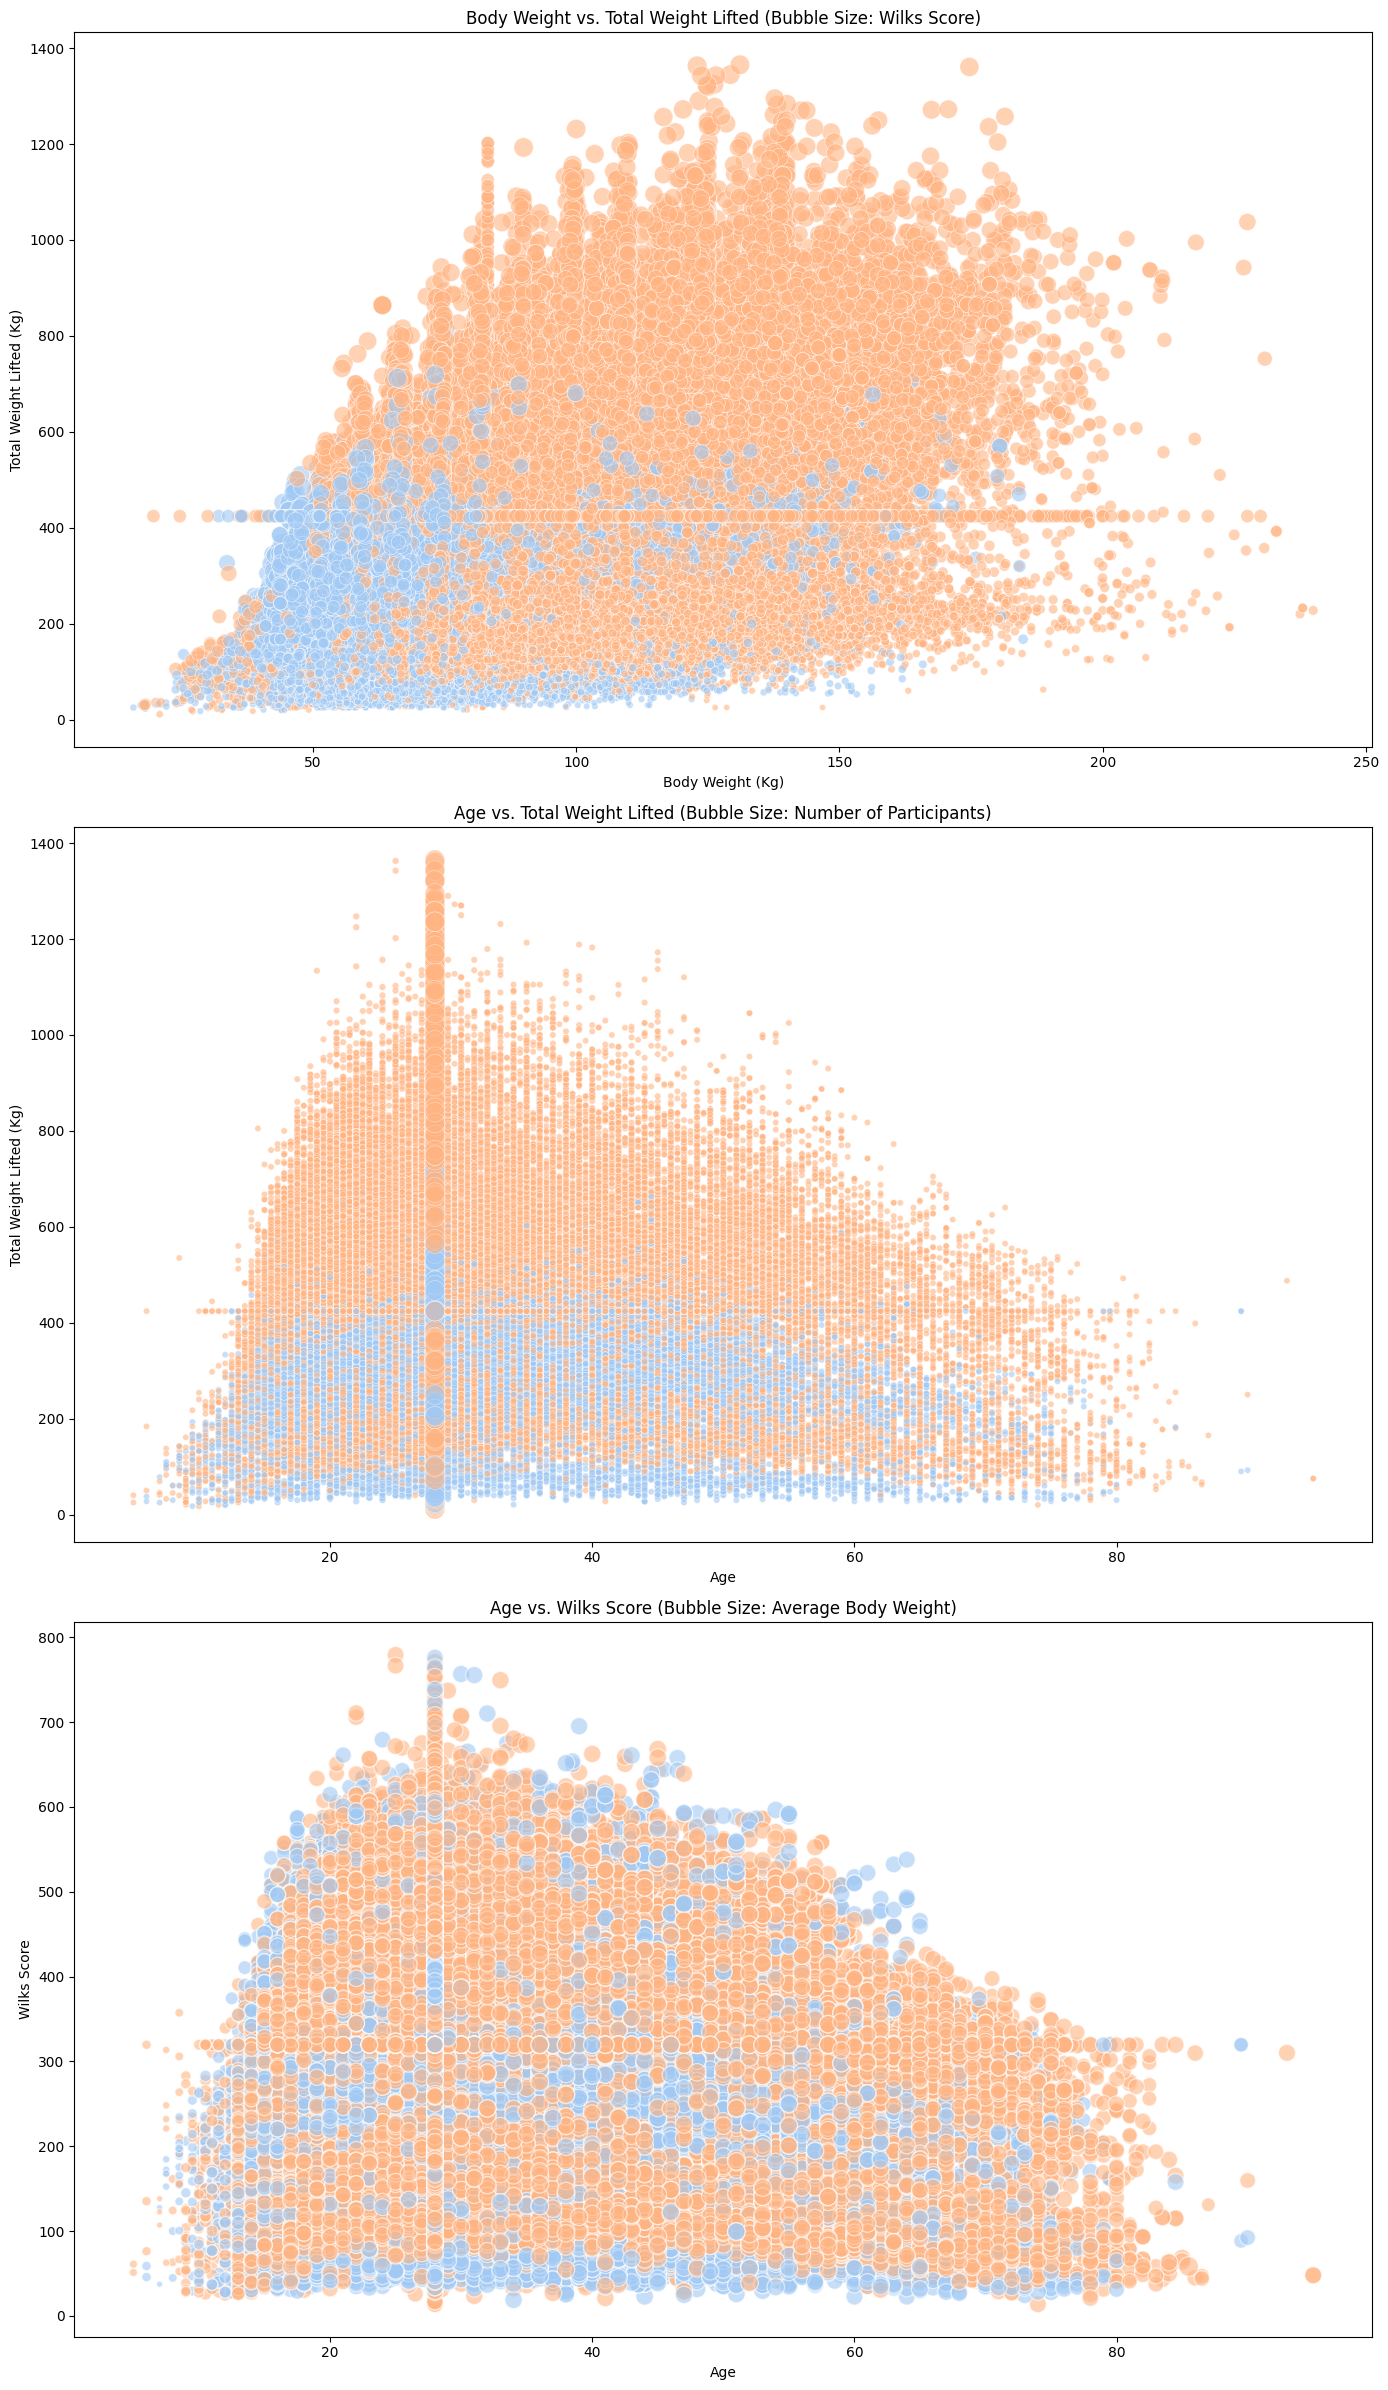

[{'Dimensions': ['Body Weight (BodyweightKg)',
   'Total Weight Lifted (TotalKg)',
   'Gender (Sex)'],
  'Metric': 'Wilks Score (Wilks)'},
 {'Dimensions': ['Age', 'Total Weight Lifted (TotalKg)', 'Gender (Sex)'],
  'Metric': 'Number of Participants (Count)'},
 {'Dimensions': ['Age', 'Wilks Score (Wilks)', 'Gender (Sex)'],
  'Metric': 'Average Body Weight (BodyweightKg)'}]

In [5]:
import seaborn as sns
# Initialize a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 24))

# 1. Bodyweight vs. Total Weight Lifted, with bubble size representing the Wilks score.
bubble_sizes_1 = powerlifting_data['Wilks'].fillna(0) * 5  # Multiply by a factor for better visualization
sns.scatterplot(data=powerlifting_data, x='BodyweightKg', y='TotalKg', size=bubble_sizes_1, hue='Sex', palette='pastel', sizes=(20, 200), ax=axes[0], alpha=0.6, legend=False)
axes[0].set_title('Body Weight vs. Total Weight Lifted (Bubble Size: Wilks Score)')
axes[0].set_xlabel('Body Weight (Kg)')
axes[0].set_ylabel('Total Weight Lifted (Kg)')

# 2. Age vs. Total Weight Lifted, with bubble size representing the number of participants.
participants_counts = powerlifting_data.groupby('Age').size()
bubble_sizes_2 = powerlifting_data['Age'].map(participants_counts).fillna(0) * 2
sns.scatterplot(data=powerlifting_data, x='Age', y='TotalKg', size=bubble_sizes_2, hue='Sex', palette='pastel', sizes=(20, 200), ax=axes[1], alpha=0.6, legend=False)
axes[1].set_title('Age vs. Total Weight Lifted (Bubble Size: Number of Participants)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Total Weight Lifted (Kg)')

# 3. Age vs. Wilks score, with bubble size representing the average body weight.
avg_bodyweight = powerlifting_data.groupby('Age')['BodyweightKg'].mean()
bubble_sizes_3 = powerlifting_data['Age'].map(avg_bodyweight).fillna(0) * 2
sns.scatterplot(data=powerlifting_data, x='Age', y='Wilks', size=bubble_sizes_3, hue='Sex', palette='pastel', sizes=(20, 200), ax=axes[2], alpha=0.6, legend=False)
axes[2].set_title('Age vs. Wilks Score (Bubble Size: Average Body Weight)')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Wilks Score')

# Adjust layout
plt.tight_layout()
plt.show()

# Dimensions and Metrics for Looker Studio
looker_info_bubble_charts = [
    {
        "Dimensions": ["Body Weight (BodyweightKg)", "Total Weight Lifted (TotalKg)", "Gender (Sex)"],
        "Metric": "Wilks Score (Wilks)"
    },
    {
        "Dimensions": ["Age", "Total Weight Lifted (TotalKg)", "Gender (Sex)"],
        "Metric": "Number of Participants (Count)"
    },
    {
        "Dimensions": ["Age", "Wilks Score (Wilks)", "Gender (Sex)"],
        "Metric": "Average Body Weight (BodyweightKg)"
    }
]
looker_info_bubble_charts


In [7]:
df['Federation'].value_counts()

Federation
USAPL             73874
THSPA             59521
USPA              56951
NSF               31067
CPU               28307
RPS               23149
SPF               17274
NASA               9060
IPF                5787
USPF               4933
NZPF               4584
UPA                4350
PA                 4313
APF                4015
IPA                4013
IPL                3878
WRPF               3809
BP                 2218
WPC                2140
CPF                2136
GPC                1735
EPF                1480
NIPF               1466
GPA                1341
NAPF               1306
IrishPF            1271
CommonwealthPF     1199
APA                1161
GPC-AUS            1086
365Strong           787
RAW                 784
EPA                 729
XPC                 669
BB                  580
FFForce             580
RUPC                578
CPL                 492
OceaniaPF           464
HERC                385
AAU                 327
GPC-GB              314
CAPO 